## 신경망 학습

### 평균 제곱 오차 (mean squared error, MSE)

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [4]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

### 교차 엔트로피 오차 (cross entropy error, CEE)

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [7]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

### 미니배치 학습

In [8]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist( normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10

batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

batch_mask

array([17210, 49594, 43696, 23709, 49241, 57842, 14579, 55663, 46815,  5696])

### (배치용) 교차 엔트로피 오차

In [10]:
#원-핫 인코딩
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y_size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [11]:
#레이블 표현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y_size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### 미분

In [12]:
#나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h 

In [13]:
# 반올림 오차 (rounding error) 문제
np.float32(1e-50)

0.0

In [14]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

### 수치 미분의 예

In [15]:
# y = 0.01 * x ** 2 + 0.1 * x
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

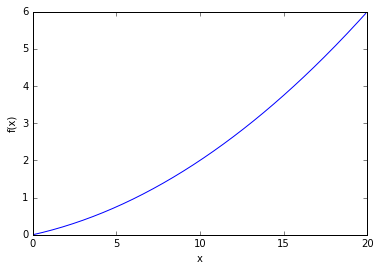

In [16]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [17]:
# x = 5
numerical_diff(function_1, 5)

0.1999999999990898

In [18]:
# x = 10
numerical_diff(function_1, 10)

0.2999999999986347

### 편미분

In [19]:
# f(x0, x1) = (x0 ** 2 )+ (x1 ** 2)
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x ** 2)

In [20]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [21]:
# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기

In [22]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [23]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [24]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [25]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])